In [1]:
import pandas as pd                     #data processing
import numpy as np                      #liner algebra
import matplotlib.pyplot as plt         #graphs
import seaborn as sns                   #visualizations

In [42]:
#Imporing the CSV dataset
train=pd.read_csv(r"data-crunch/train.csv",na_values=['??','????'])
test=pd.read_csv(r"data-crunch/test.csv",na_values=['??','????'])
submission=pd.read_csv(r"data-crunch/SubmissionSample.csv",na_values=['??','????'])
print(submission[10:20])

#Making a copy of the original dataset for working
train_orig=train.copy(deep=True)
test_orig=test.copy(deep=True)


train.columns


    Loan.ID  Loan.Status
10       38          NaN
11       42          NaN
12       45          NaN
13       48          NaN
14       50          NaN
15       56          NaN
16       60          NaN
17       63          NaN
18       66          NaN
19       68          NaN


Index(['Loan.ID', 'Current.Loan.Amount', 'Term', 'Credit.Score',
       'Years.in.current.job', 'Home.Ownership', 'Annual.Income', 'Purpose',
       'Monthly.Debt', 'Years.of.Credit.History',
       'Months.since.last.delinquent', 'Number.of.Open.Accounts',
       'Number.of.Credit.Problems', 'Current.Credit.Balance',
       'Maximum.Open.Credit', 'Bankruptcies', 'Tax.Liens', 'Loan.Status'],
      dtype='object')

In [43]:
test.columns
print(train[10:20])

    Loan.ID  Current.Loan.Amount        Term  Credit.Score  \
10       15                20044  Short Term         741.0   
11       16                12473  Short Term           NaN   
12       17                 3920  Short Term           NaN   
13       18                 4836  Short Term         723.0   
14       19                 6162  Short Term         684.0   
15       21                15538  Short Term         709.0   
16       22                 5917  Short Term         745.0   
17       23                 5066  Short Term         745.0   
18       25                32596   Long Term         739.0   
19       26                 5409  Short Term         744.0   

   Years.in.current.job Home.Ownership  Annual.Income             Purpose  \
10              3 years  Home Mortgage        91200.0  Debt Consolidation   
11            10+ years  Home Mortgage            NaN               other   
12              8 years           Rent            NaN  Debt Consolidation   
13       

In [4]:
print(np.unique(train['Term'].values))
print(np.unique(train['Purpose'].values))
print(np.unique(train['Home.Ownership'].values))
print(train['Home.Ownership'].value_counts())

['Long Term' 'Short Term']
['Business Loan' 'Buy House' 'Buy a Car' 'Debt Consolidation'
 'Educational Expenses' 'Home Improvements' 'Medical Bills' 'Other'
 'Take a Trip' 'major_purchase' 'moving' 'other' 'renewable_energy'
 'small_business' 'vacation' 'wedding']
['HaveMortgage' 'Home Mortgage' 'Own Home' 'Rent']
Home Mortgage    29447
Rent             25737
Own Home          5516
HaveMortgage       104
Name: Home.Ownership, dtype: int64


In [5]:
print(train['Loan.Status'].value_counts())
print(train['Loan.Status'].value_counts(normalize=True))
print(train.shape,test.shape)
print(train["Loan.Status"].count())
print(train["Loan.Status"].value_counts())
print(train["Loan.Status"].value_counts(normalize=True)*100)

1    46178
0    14626
Name: Loan.Status, dtype: int64
1    0.759457
0    0.240543
Name: Loan.Status, dtype: float64
(60804, 18) (23386, 18)
60804
1    46178
0    14626
Name: Loan.Status, dtype: int64
1    75.945661
0    24.054339
Name: Loan.Status, dtype: float64


Loan.Status        0      1
Home.Ownership             
HaveMortgage      16     88
Home Mortgage   6425  23022
Own Home        1317   4199
Rent            6868  18869


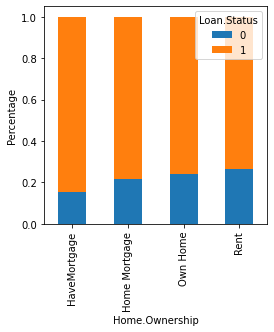

In [6]:
print(pd.crosstab(train["Home.Ownership"],train["Loan.Status"]))
Married=pd.crosstab(train["Home.Ownership"],train["Loan.Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Home.Ownership")
plt.ylabel("Percentage")
plt.show()

Loan.Status     0      1
Term                    
Long Term    5428  11192
Short Term   9198  34986


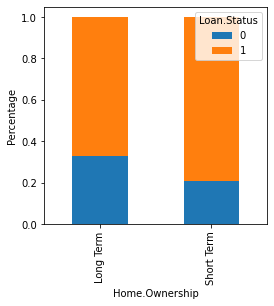

In [8]:
print(pd.crosstab(train["Term"],train["Loan.Status"]))
stuff=pd.crosstab(train["Term"],train["Loan.Status"])
stuff.div(stuff.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Home.Ownership")
plt.ylabel("Percentage")
plt.show()

In [9]:
train.isnull().sum()

Loan.ID                             0
Current.Loan.Amount                 0
Term                                0
Credit.Score                    12229
Years.in.current.job             2529
Home.Ownership                      0
Annual.Income                   12229
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent    32475
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                      127
Tax.Liens                           2
Loan.Status                         0
dtype: int64

In [10]:
bins =[0,30000,60000,90000,1600000]
group=[0,1,2,3]
train["income_bin"]=pd.cut(train["Annual.Income"],bins,labels=group)

Loan.Status     0      1
income_bin              
0             967   2447
1            5031  14431
2            3154  11416
3            2039   9087


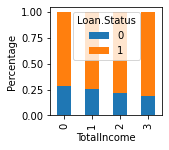

In [11]:
print(pd.crosstab(train["income_bin"],train["Loan.Status"]))
TotalIncome = pd.crosstab(train["income_bin"],train["Loan.Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

In [44]:
train.head(3)
X=train.drop("Term",axis=1)
X=train.drop("Years.in.current.job",axis=1)
y=train[["Loan.Status"]]
X=train[["Monthly.Debt","Current.Credit.Balance"]]

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

In [46]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)

/home/shrikumaran/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [47]:
pred_cv_forest=forest_model.predict(x_cv)

In [48]:
from sklearn.metrics import accuracy_score
score_forest = accuracy_score(pred_cv_forest,y_cv)*100

In [49]:
score_forest

75.90176515732924

In [94]:
test1=test[["Monthly.Debt","Years.of.Credit.History"]]
pred_test_forest=forest_model.predict(test1)
test1

,Monthly.Debt,Years.of.Credit.History
0,839.28,16.4
1,605.65,18.8
2,338.69,10.8
3,506.38,5.7
4,1420.73,24.6
...,...,...
23381,2041.66,19.4
23382,988.35,13.0
23383,172.36,14.0
23384,842.41,16.0


In [95]:
pred_test_forest

array([1, 1, 1, ..., 1, 1, 1])

In [96]:
test1

,Monthly.Debt,Years.of.Credit.History
0,839.28,16.4
1,605.65,18.8
2,338.69,10.8
3,506.38,5.7
4,1420.73,24.6
...,...,...
23381,2041.66,19.4
23382,988.35,13.0
23383,172.36,14.0
23384,842.41,16.0


In [97]:
test1=test1.drop(["Monthly.Debt"],axis=1)

In [60]:
test1["Current.Credit.Balance"]=pred_test_forest

In [62]:
test1.columns = ['Loan.Status']

In [98]:
test1

,Years.of.Credit.History
0,16.4
1,18.8
2,10.8
3,5.7
4,24.6
...,...
23381,19.4
23382,13.0
23383,14.0
23384,16.0


In [99]:
test1["Loan.ID"]=test["Loan.ID"]

In [104]:
pd.DataFrame(test1).to_csv('sub.csv')
test1

,Loan.ID
0,2
1,6
2,9
3,12
4,14
...,...
23381,84174
23382,84177
23383,84180
23384,84182


In [68]:
sub = pd.read_csv('sub.csv', index_col = 0)  

In [71]:
sub = sub.drop(sub.columns[[0]], axis=1)

In [105]:
sub = pd.read_csv('sub.csv', index_col=0)

In [106]:
pd.DataFrame(sub).to_csv('sub1.csv',index=False)

In [107]:
sub1 = pd.read_csv('sub1.csv', index_col = 0)  

In [108]:
pd.DataFrame(sub1).to_csv('sub1.csv')

In [110]:
sub1["Loan.Status"]=pred_test_forest

In [111]:
pd.DataFrame(sub1).to_csv('sub1.csv')

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
tree_model = DecisionTreeClassifier(random_state=1)

In [115]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [116]:
pred_cv_tree=tree_model.predict(x_cv)

In [118]:
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 
score_tree

65.72744216642911

In [120]:
testLR=test[["Monthly.Debt","Years.of.Credit.History"]]

pred_test_tree = tree_model.predict(testLR)

In [121]:
pred_test_tree

array([0, 1, 1, ..., 0, 0, 0])

In [131]:
subLR=testLR.copy()
subLR

,Monthly.Debt,Years.of.Credit.History
0,839.28,16.4
1,605.65,18.8
2,338.69,10.8
3,506.38,5.7
4,1420.73,24.6
...,...,...
23381,2041.66,19.4
23382,988.35,13.0
23383,172.36,14.0
23384,842.41,16.0


In [134]:
subLR=subLR.drop(["Monthly.Debt"],axis=1)

In [129]:
subLR["Years.of.Credit.History"]=test["Loan.ID"]

In [132]:
subLR["Loan.Status"]=pred_test_tree

In [136]:
subLR["Years.of.Credit.History"]=test["Loan.ID"]

In [137]:
subLR

,Years.of.Credit.History,Loan.Status
0,2,0
1,6,1
2,9,1
3,12,0
4,14,0
...,...,...
23381,84174,1
23382,84177,1
23383,84180,0
23384,84182,0


In [138]:
subLR.columns=["Loan.ID","Loan.Status"]

In [139]:
subLR

,Loan.ID,Loan.Status
0,2,0
1,6,1
2,9,1
3,12,0
4,14,0
...,...,...
23381,84174,1
23382,84177,1
23383,84180,0
23384,84182,0


In [141]:
pd.DataFrame(subLR).to_csv('subLR.csv',index=False)

In [142]:
sub2 = pd.read_csv('subLR.csv', index_col=0)

In [143]:
sub2

,Loan.Status
Loan.ID,
2,0
6,1
9,1
12,0
14,0
...,...
84174,1
84177,1
84180,0
